In [1]:
# Retorna jogada da rodada requerida
def get_jogada_rodada(jogadas, rodada):
    rodada = rodada + ''
    jogadaRodada = {}
    for jogada in jogadas:
        if jogada['rodada'] == rodada:
            jogadaRodada = jogada
            break
    return jogadaRodada

In [2]:
# Retorna taxa básioca de juros
def get_taxa_basica_juros(taxas, rodada):
    rodada = rodada + ''
    taxa = 0
    for t in taxas:
        if t['rodada'] == rodada:
            taxa = t['taxaJuros']
            break
    return taxa

In [3]:
# Criar JSON Cadastro Partida
def criar_json_cadastro_partida(dado):
    json_final = {
        "quantidadeRodadas": int(dado["quantidadeRodadas"]),
        "fatiaMercado": int(dado["fatiaMercado"]),
        "variavelMicroeconomica": {
            "preco": int(dado["preco"]),
            "fatorPenalidadePreco": int(dado["fatorPenalidadePreco"]),
            "propaganda": int(dado["propaganda"]),
            "porcentagemPropagandaRadio": int(dado["porcentagemPropagandaRadio"]),
            "valorMinimoPropagandaRadio": float(dado["valorMinimoPropagandaRadio"]),
            "proporcaoCrescimentoPropagandaRadio": float(dado["proporcaoCrescimentoPropagandaRadio"]),
            "porcentagemPropagandaJornal": int(dado["porcentagemPropagandaJornal"]),
            "valorMinimoPropagandaJornal": float(dado["valorMinimoPropagandaJornal"]),
            "proporcaoCrescimentoPropagandaJornal": float(dado["proporcaoCrescimentoPropagandaJornal"]),
            "porcentagemPropagandaTV": int(dado["porcentagemPropagandaTV"]),
            "valorMinimoPropagandaTV": float(dado["valorMinimoPropagandaTV"]),
            "proporcaoCrescimentoPropagandaTV": float(dado["proporcaoCrescimentoPropagandaTV"]),
            "porcentagemPropagandaInternet": int(dado["porcentagemPropagandaInternet"]),
            "valorMinimoPropagandaInternet": float(dado["valorMinimoPropagandaInternet"]),
            "proporcaoCrescimentoPropagandaInternet": float(dado["proporcaoCrescimentoPropagandaInternet"]),
            "confiabilidadeProduto1": int(dado["confiabilidadeProduto1"]),
            "confiabilidadeProduto2": int(dado["confiabilidadeProduto2"]),
            "confiabilidadeProduto3": int(dado["confiabilidadeProduto3"]),
            "capacidadeInstalada": int(dado["capacidadeInstalada"]),
            "tamanhoEstabelecimentoPequeno": int(dado["tamanhoEstabelecimentoPequeno"]),
            "pesoTamanhoEstabelecimentoPequeno": int(dado["pesoTamanhoEstabelecimentoPequeno"]),
            "qtdMaxCaixasEstabelecimentoPequeno": int(dado["qtdMaxCaixasEstabelecimentoPequeno"]),
            "tamanhoEstabelecimentoMedio": int(dado["tamanhoEstabelecimentoMedio"]),
            "pesoTamanhoEstabelecimentoMedio": int(dado["pesoTamanhoEstabelecimentoMedio"]),
            "qtdMaxCaixasEstabelecimentoMedio": int(dado["qtdMaxCaixasEstabelecimentoMedio"]),
            "tamanhoEstabelecimentoGrande": int(dado["tamanhoEstabelecimentoGrande"]),
            "pesoTamanhoEstabelecimentoGrande": int(dado["pesoTamanhoEstabelecimentoGrande"]),
            "qtdMaxCaixasEstabelecimentoGrande": int(dado["qtdMaxCaixasEstabelecimentoGrande"]),
            "pesoCaixas": int(dado["pesoCaixas"]),
            "pesoFuncionarios": int(dado["pesoFuncionarios"])
        },
        "variavelMacroeconomica": {
            "fatorAjuste": int(dado["fatorAjuste"])
        }
    }
    
    return json_final

In [4]:
# Criar JSON Registro Jogada
def criar_json_registro_jogada(jogadaRodada, identificacaoJogada):
    json_final = {
        "identificacaoJogada": str(identificacaoJogada),
        "preco": float(jogadaRodada["preco"]),
        "investimentoPropagandaRadio": float(jogadaRodada["investimentoPropagandaRadio"]),
        "investimentoPropagandaJornal": float(jogadaRodada["investimentoPropagandaJornal"]),
        "investimentoPropagandaTV": float(jogadaRodada["investimentoPropagandaTV"]),
        "investimentoPropagandaInternet": float(jogadaRodada["investimentoPropagandaInternet"]),
        "qtdProdutosEstoqueFornecedor1": int(jogadaRodada["qtdProdutosEstoqueFornecedor1"]),
        "qtdProdutosEstoqueFornecedor2": int(jogadaRodada["qtdProdutosEstoqueFornecedor2"]),
        "qtdProdutosEstoqueFornecedor3": int(jogadaRodada["qtdProdutosEstoqueFornecedor3"]),
        "tamanhoEstabelecimento": str(jogadaRodada["tamanhoEstabelecimento"]), 
        "qtdCaixas": int(jogadaRodada["qtdCaixas"]),
        "qtdFuncionarios": int(jogadaRodada["qtdFuncionarios"])
    }
    return json_final

In [5]:
# Monta JSON Registro Rodada
def criar_json_registro_rodada(identificacaoPartida, taxasBasicasJuros, jogadas):
    json_final = {
        "identificacaoPartida": str(identificacaoPartida),
        "variavelMacroeconomica": {
            "taxaJuros": float(taxasBasicasJuros) if taxasBasicasJuros is not None else None
        },
        "jogadas": jogadas
    }
    return json_final

In [6]:
import csv

# Função para ler o arquivo CSV e retornar os dados como uma lista de dicionários (JSON-like)
def csv_para_json(caminho_csv, qtd_linhas=None, como_lista=True):
    # Abrir o arquivo CSV
    with open(caminho_csv, mode='r', encoding='utf-8') as csv_file:
        # Ler o arquivo CSV usando DictReader
        csv_reader = csv.DictReader(csv_file)
        
        # Converter cada linha do CSV em um dicionário e adicionar a uma lista
        dados = []
        for i, linha in enumerate(csv_reader):
            if qtd_linhas and i >= qtd_linhas:
                break
            dados.append(linha)
    
    # Se como_lista for False e a quantidade de linhas for 1, retorna um dicionário em vez de uma lista
    if not como_lista and len(dados) == 1:
        return dados[0]
    
    return dados

In [7]:
import requests

# Função para cadastrar uma partida
def cadastrar_partida(dados):
    url = 'http://localhost:8080/api/partida/cadastrar'
    headers = {
        'Content-Type': 'application/json'
    }
    response = requests.post(url, json=dados, headers=headers)
    return response

In [8]:
import requests

# Função para registrar uma rodada
def registrar_rodada(dados):
    url = 'http://localhost:8080/api/rodada/registrarRodada'
    headers = {
        'Content-Type': 'application/json'
    }
    response = requests.post(url, json=dados, headers=headers)
    return response

In [9]:
# Gerar lista de jogadores a serem eliminados em cada partida

from random import randint

def gerar_lista_jogadores_partida(qtd_jogadores, qtd_eliminar):
    lista_jogadores = list(range(1, qtd_jogadores+1))
    for _ in range(qtd_eliminar):
        index = randint(0, len(lista_jogadores)-1)
        del(lista_jogadores[index])
    
    return lista_jogadores

def sortear_jogador_escolhido_analise(lista_jogadores):
    index = randint(0, len(lista_jogadores)-1)
    return lista_jogadores[index]


In [10]:
# Configura dicionário jogada a ser salvo excel

def configurar_dicionario_jogada(jogada):
    if jogada["tamanhoEstabelecimento"] == "PEQUENO":
        tamanho_estabelecimento = 1
    elif jogada["tamanhoEstabelecimento"] == "MEDIO":
        tamanho_estabelecimento = 2
    else:
        tamanho_estabelecimento = 3
    retorno = {
        "rodada": int(jogada["rodada"]),
        "demandaTotalJogada": int(jogada["demandaTotalJogada"]),
        "preco": float(jogada["preco"]),
        "investimentoPropagandaRadio": float(jogada["investimentoPropagandaRadio"]),
        "investimentoPropagandaJornal": float(jogada["investimentoPropagandaJornal"]),
        "investimentoPropagandaTV": float(jogada["investimentoPropagandaTV"]),
        "investimentoPropagandaInternet": float(jogada["investimentoPropagandaInternet"]),
        "qtdProdutosEstoqueFornecedor1": int(jogada["qtdProdutosEstoqueFornecedor1"]),
        "qtdProdutosEstoqueFornecedor2": int(jogada["qtdProdutosEstoqueFornecedor2"]),
        "qtdProdutosEstoqueFornecedor3": int(jogada["qtdProdutosEstoqueFornecedor3"]),
        "tamanhoEstabelecimento": int(tamanho_estabelecimento), 
        "qtdCaixas": int(jogada["qtdCaixas"]),
        "qtdFuncionarios": int(jogada["qtdFuncionarios"])
    }
    return retorno

In [11]:
import pandas as pd

# Função para salvar os dados em um arquivo xlsx
def salvar_dados_xlsx(dados, caminho_xlsx):
    # Converter os dados para um DataFrame do Pandas
    df = pd.DataFrame(dados)
    
    # Salvar o DataFrame em um arquivo xlsx
    df.to_excel(caminho_xlsx, index=False)

In [12]:
import json

# Salvando arquivo com dados finais de demanda dos jogadores por partida
def salvar_dados_json_partida(nomeArq, dados):
    nomeArq = nomeArq + '.json'
    with open(nomeArq, "w") as arquivo:
        arquivo.write(json.dumps(dados))

In [14]:
# SE INICIA AQUI

qtd_partidas = 10
qtd_jogadores = 10

for cont_partida in range(1, qtd_partidas+1):
    
    # Definindo lista de jogadores por partida
    lista_jogadores = gerar_lista_jogadores_partida(qtd_jogadores, cont_partida-1)
    print('Lista de jogadores: ' + str(lista_jogadores))

    # Definindo jogador escolhido para análise de regressão linear múltipla por partida
    jogador_escolhido = sortear_jogador_escolhido_analise(lista_jogadores)
    print('Jogador escolhido para análise: ' + str(jogador_escolhido))

    # Ler o arquivo CSV para cadastrar partida
    dados_cadastro = csv_para_json('cad_partida.csv', 1, False)

    # Convertendo os dados do excel de cadastro para JSON de envio
    dados_cadastro = criar_json_cadastro_partida(dados_cadastro)

    # Fazendo cadastro da partida
    dados_finais = {}
    for i in lista_jogadores:
        dados_finais[f'jogador{i}'] = []

    dados_jogador_escolhido = []

    response_cad_partida = cadastrar_partida(dados_cadastro)
    if response_cad_partida.status_code == 200:
        print('Partida ' + str(cont_partida) +  ' cadastrada com sucesso!')

        # Recuperando dados necessáros para cadastro de rodadas
        total_rodadas = dados_cadastro['quantidadeRodadas']
        identificacao_partida = response_cad_partida.json()['identificacaoPartida']

        # Recuperando taxas básicas de juros
        taxas_basicas_juros = csv_para_json('taxas_basica_juros.csv')

        # Recuperando dados da rodada
        dados_rodadas = {}
        for i in lista_jogadores:
            nome_csv = f'jogador{i}.csv'
            dados_rodadas[f'jogador{i}'] = (csv_para_json(nome_csv))
        
        # Fazendo cadastro das rodadas
        for i in range(1, total_rodadas + 1):
            
            jogada_rodada_jogador_escolhido = None
            dados_jogadas = []
            for j in lista_jogadores:
                jogada_rodada = get_jogada_rodada(dados_rodadas[f'jogador{j}'], str(i))
                if j == jogador_escolhido:
                    jogada_rodada_jogador_escolhido = jogada_rodada
                json_jogada = criar_json_registro_jogada(jogada_rodada, j)
                dados_jogadas.append(json_jogada)

            taxa_basica_juros = None
            if (i - 1) % 3 == 0:
                taxa_basica_juros = get_taxa_basica_juros(taxas_basicas_juros, str(i))
            
            json_rodada = criar_json_registro_rodada(identificacao_partida, taxa_basica_juros, dados_jogadas)
            
            response_reg_rodada = registrar_rodada(json_rodada)

            if response_reg_rodada.status_code == 200:
                #print(f'Rodada {i} registrada com sucesso!')

                for jogada in response_reg_rodada.json()["rodada"]["jogadas"]:
                    identificacao_jogada = jogada["identificacaoJogada"]
                    dados_finais['jogador' + identificacao_jogada].append(jogada["demandaTotalJogada"])
                    if identificacao_jogada == str(jogador_escolhido):
                        jogada_rodada_jogador_escolhido['demandaTotalJogada'] = jogada["demandaTotalJogada"]

                dados_jogador_escolhido.append(configurar_dicionario_jogada(jogada_rodada_jogador_escolhido))

            else:
                print(f'Erro ao registrar rodada {i}!')
                print(response_reg_rodada.json()["erros"])
                break
            
        salvar_dados_xlsx(dados_jogador_escolhido, f'dados_jogadores_selecionados/partida_{cont_partida}_dados_jogador_{jogador_escolhido}.xlsx')
        salvar_dados_json_partida(f'dados_finais_partidas/partida_{cont_partida}', dados_finais)

        print('Todos os dados: ' + str(dados_finais))
        print('Dados jogador escolhido: ' + str(dados_jogador_escolhido))
        print()

    else:
        print('Erro ao cadastrar partida!')
        print(response_cad_partida.json()["erros"])

Lista de jogadores: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Jogador escolhido para análise: 9
Partida 1 cadastrada com sucesso!
Todos os dados: {'jogador1': [606, 225, 510, 432, 496, 502, 218, 304, 366, 264, 338, 294, 331, 336, 233, 500, 368, 278, 270, 284, 491, 369, 211, 233, 379, 279, 378, 364, 417, 492, 532, 449, 199, 462, 298, 441], 'jogador2': [588, 430, 625, 262, 520, 405, 274, 264, 280, 495, 389, 413, 284, 514, 364, 306, 164, 341, 524, 407, 367, 314, 450, 598, 403, 415, 342, 253, 364, 306, 364, 259, 447, 264, 487, 403], 'jogador3': [544, 549, 528, 641, 434, 398, 420, 334, 346, 452, 427, 192, 484, 169, 304, 338, 469, 454, 515, 336, 387, 294, 455, 404, 305, 333, 595, 389, 272, 207, 492, 287, 297, 326, 312, 390], 'jogador4': [613, 574, 584, 386, 383, 507, 211, 362, 443, 604, 250, 364, 430, 404, 562, 349, 545, 531, 401, 445, 443, 367, 450, 415, 404, 320, 293, 495, 397, 602, 554, 303, 375, 340, 546, 249], 'jogador5': [225, 407, 463, 278, 372, 534, 452, 270, 373, 228, 495, 453, 377, 451, 368,

In [18]:
# Ler arquivo json e salvar em um diciionário
def ler_arquivo_json(nomeArq):
    with open(nomeArq, "r", encoding="utf-8") as arquivo:
        retorno = json.load(arquivo)
    return retorno

# Ler os dados finais de demanda dos jogadores por partida
dados_partida = ler_arquivo_json('dados_finais_partidas/partida_1.json')

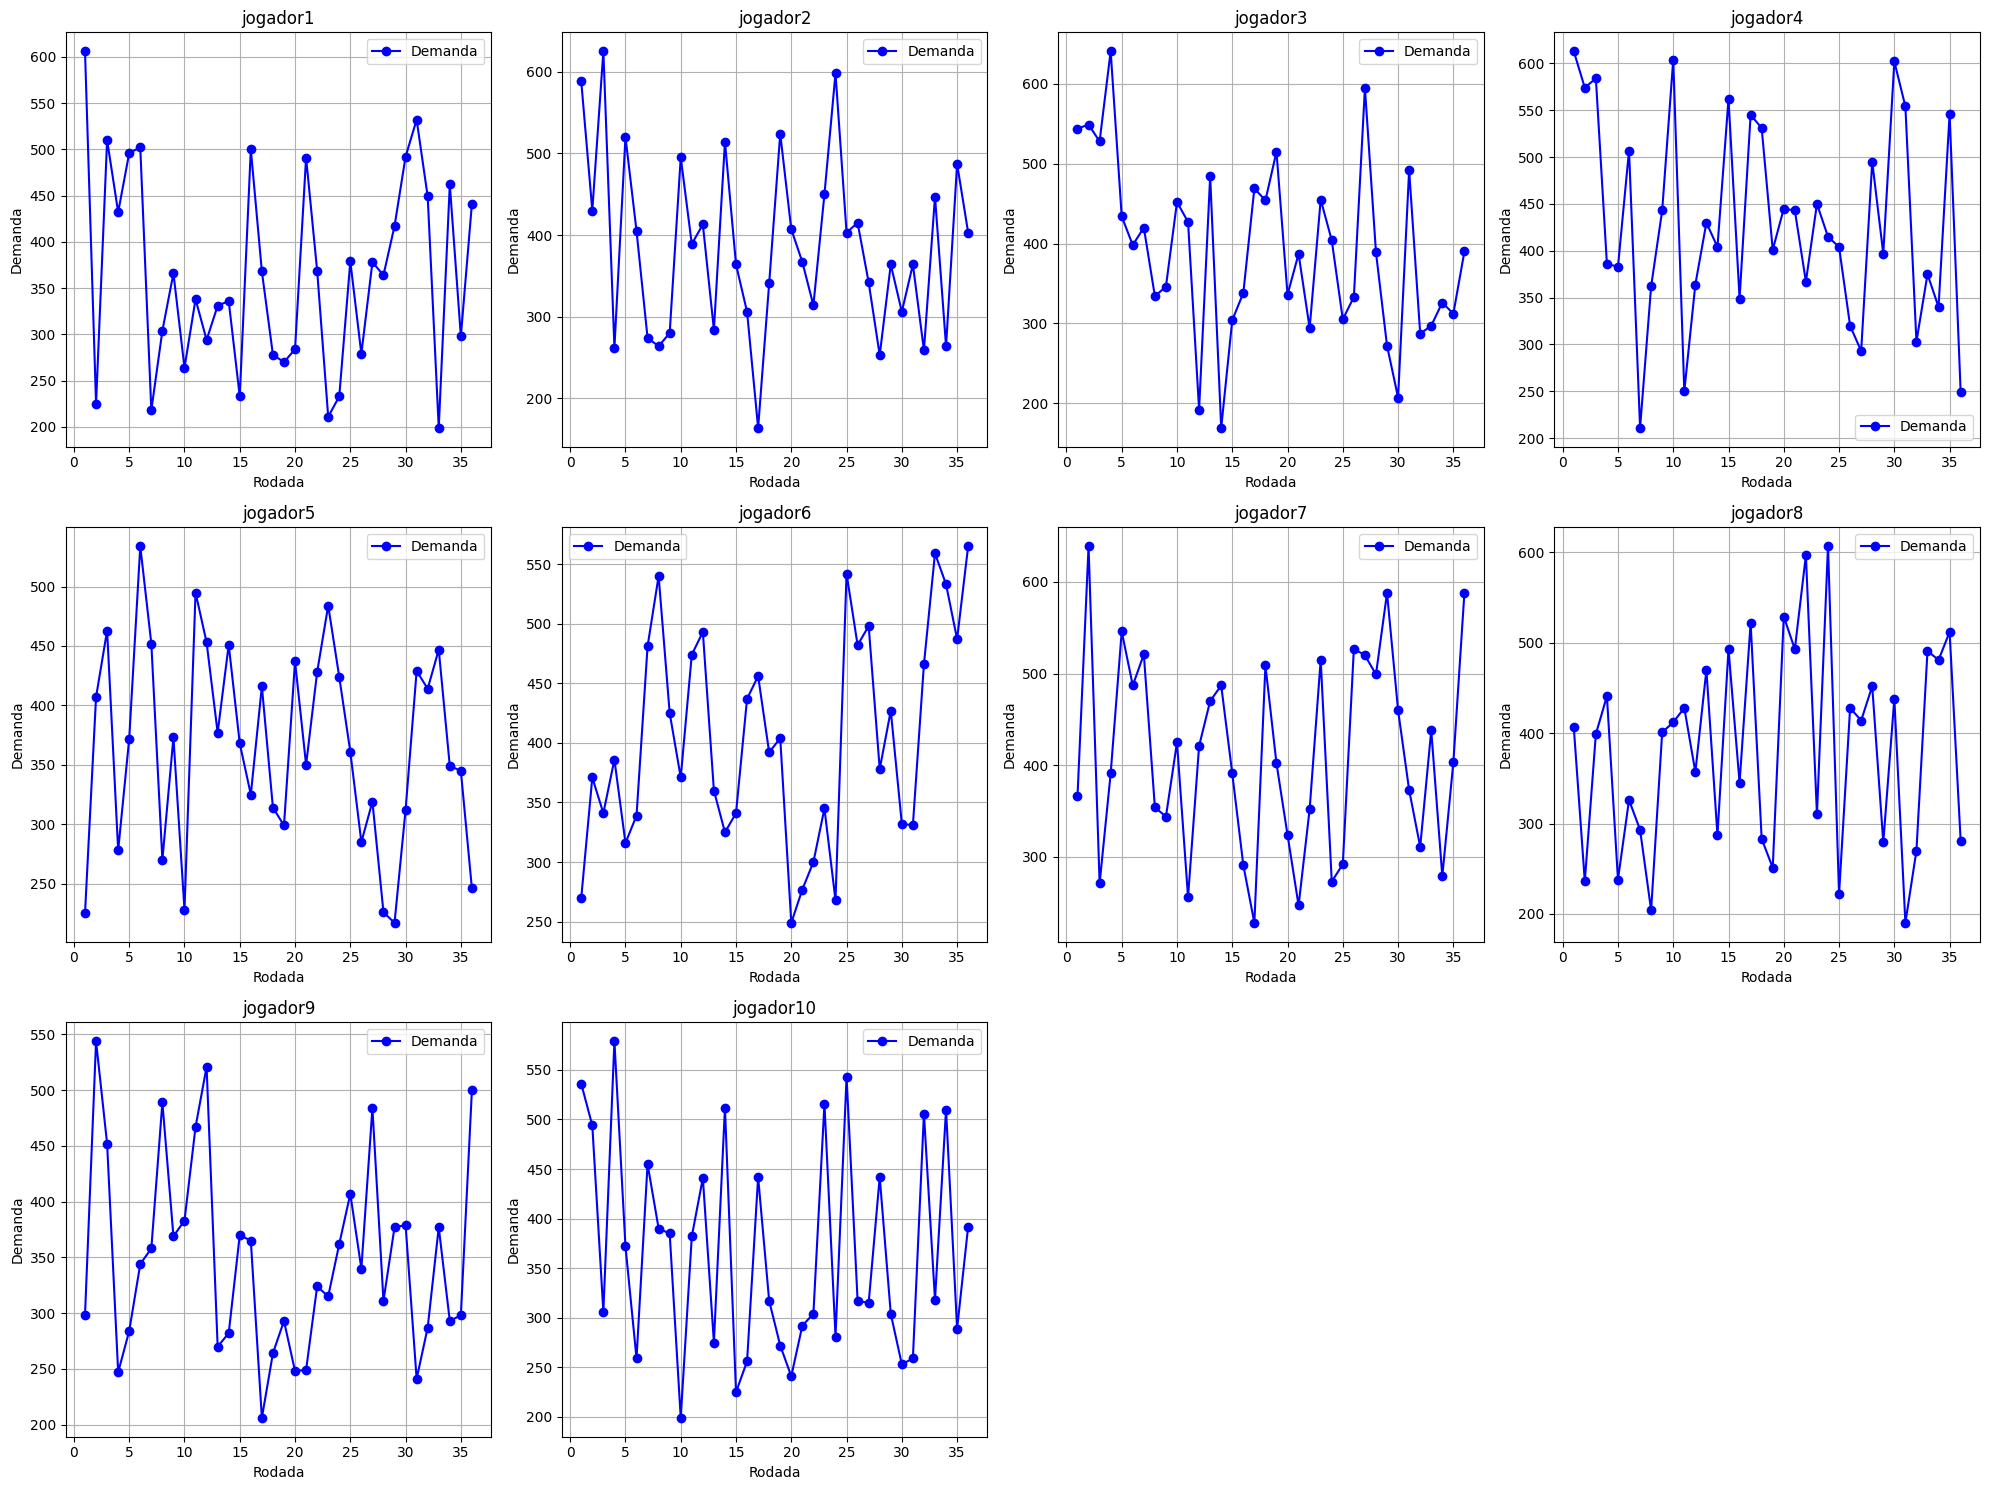

In [19]:
import matplotlib.pyplot as plt

# Configuração da grade para subplots (3 linhas x 4 colunas)
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # 3 linhas e 4 colunas

# Loop para plotar cada jogador em uma posição da grade
for i, (jogador, demandas) in enumerate(dados_partida.items()):
    ax = axes[i // 4, i % 4]  # Seleciona a posição do subplot

    rodadas = range(1, len(demandas) + 1)
    ax.plot(rodadas, demandas, marker='o', linestyle='-', color='b', label='Demanda')

    # Configurações de título e rótulos para cada subplot
    ax.set_title(f'{jogador}')
    ax.set_xlabel('Rodada')
    ax.set_ylabel('Demanda')
    ax.grid(True)
    ax.legend()

# Remove subplots vazios
for j in range(i + 1, 3 * 4):
    fig.delaxes(axes[j // 4, j % 4])  # Remove qualquer eixo não utilizado

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

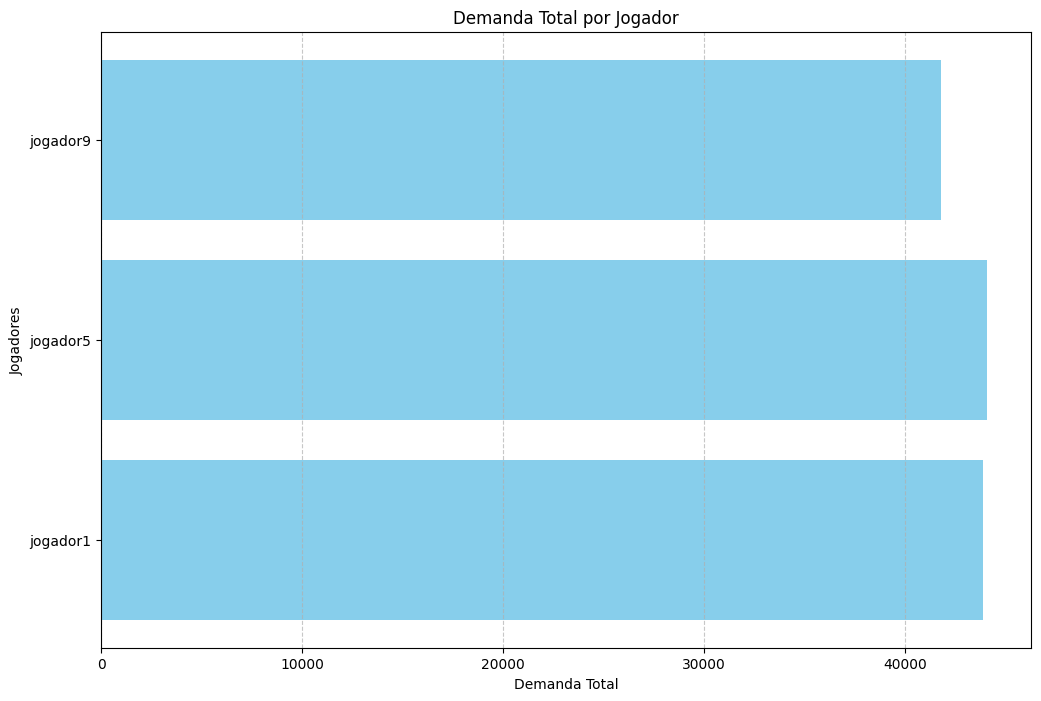

In [41]:
import matplotlib.pyplot as plt

# Calculando a demanda total para cada jogador
demandas_totais = {jogador: sum(demandas) for jogador, demandas in dados_partida.items()}

# Preparando os dados para o gráfico
jogadores = list(demandas_totais.keys())
totais = list(demandas_totais.values())

# Criando o gráfico de barras horizontal
plt.figure(figsize=(12, 8))  # Ajuste o comprimento para acomodar todos os nomes
plt.barh(jogadores, totais, color='skyblue')
plt.xlabel('Demanda Total')
plt.ylabel('Jogadores')
plt.title('Demanda Total por Jogador')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

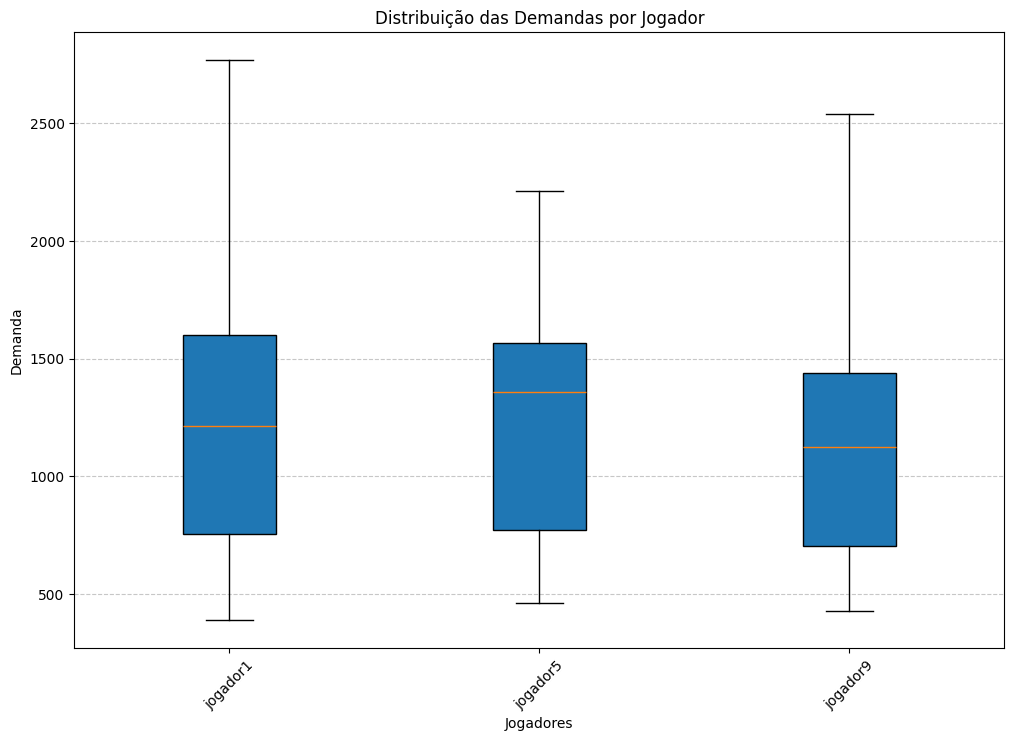

In [42]:
import matplotlib.pyplot as plt

# Preparar os dados para o boxplot
jogadores = []
labels = []

# Iterar sobre os dados para extrair as demandas de cada jogador
for jogador, demandas in dados_partida.items():
    jogadores.append(demandas)
    labels.append(jogador)

# Criar o gráfico de caixa (boxplot)
plt.figure(figsize=(12, 8))
plt.boxplot(jogadores, tick_labels=labels, vert=True, patch_artist=True)  # `patch_artist` para preenchimento colorido
plt.xlabel('Jogadores')
plt.ylabel('Demanda')
plt.title('Distribuição das Demandas por Jogador')
plt.xticks(rotation=45)  # Rotacionar rótulos se necessário para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()